In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for aesthetics
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
try:
    df = pd.read_csv('../dataset/train.csv')
except FileNotFoundError:
    print("Error: 'train.csv' not found. Make sure it's in the 'dataset' folder.")

In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,topic,problem_statement,solution,answer_option_1,answer_option_2,answer_option_3,answer_option_4,answer_option_5,correct_option_number
0,Optimization of actions and planning,Maria needs to prepare for a party and has lim...,Maria should first prepare the cake and put it...,"Bake the cake, decorate the living room, pick ...","Decorate the living room, bake the cake, pick ...","Pick up friend, bake the cake, decorate the li...","Bake the cake, decorate the living room, pick ...",Another answer,4
1,Spatial reasoning,"In a room, there are 4 corners: A, B, C, and D...",The only point in a square room that is equidi...,At the center of the room,Halfway between corner A and the center of the...,At corner A,"Nowhere, because it's a logical trap",Another answer,4
2,Spatial reasoning,"Imagine that you are in a room with 4 walls, e...","To solve this spatial reasoning puzzle, you mu...","Right, Forward, Left","Right, Left, Forward","Forward, Left, Right","Left, Right, Forward",Another answer,5
3,Optimization of actions and planning,"Laura is planning to visit three cities: A, B,...",The shortest route Laura can take is to start ...,A-B-C-A,A-C-B-A,B-A-C-B,C-A-B-C,Another answer,2
4,Operation of mechanisms,"In a room, there are three machines controlled...",Start by flipping Switch 1 and wait for a coup...,Flip all switches and immediately check the ma...,Flip each switch one by one and enter the room...,"Flip Switch 1, wait, flip it back, flip Switch...",Leave all switches off and guess the correspon...,Another answer,5


In [4]:
print(f"Dataset dimensions (rows, columns): {df.shape}")

Dataset dimensions (rows, columns): (384, 9)


In [5]:
print("\nDataframe Info (column types and non-null counts):")
df.info()


Dataframe Info (column types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   topic                  384 non-null    object
 1   problem_statement      384 non-null    object
 2   solution               384 non-null    object
 3   answer_option_1        384 non-null    object
 4   answer_option_2        384 non-null    object
 5   answer_option_3        384 non-null    object
 6   answer_option_4        382 non-null    object
 7   answer_option_5        384 non-null    object
 8   correct_option_number  384 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 27.1+ KB


In [6]:
print("Descriptive statistics for numerical columns:")
df.describe()

Descriptive statistics for numerical columns:


,correct_option_number
count,384.000000
mean,2.710938
std,1.398352
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,5.000000


In [7]:
print("\nDescriptive statistics for categorical columns:")
df.describe(include=['object', 'category'])


Descriptive statistics for categorical columns:


,topic,problem_statement,solution,answer_option_1,answer_option_2,answer_option_3,answer_option_4,answer_option_5
count,384,384,384,384,384,384,382,384
unique,7,384,384,320,321,333,327,1
top,Spatial reasoning,Ashley is planning her study schedule for the ...,"Let's say Ashley spends 't' hours on Physics, ...",5,3,4,6,Another answer
freq,94,1,1,7,6,8,7,384


In [8]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.concat([missing_values, missing_percent], axis=1)
missing_table = missing_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

print("Columns with missing values:")
missing_table[missing_table['Missing Values'] > 0].sort_values(by='% of Total Values', ascending=False)

Columns with missing values:


,Missing Values,% of Total Values
answer_option_4,2,0.520833


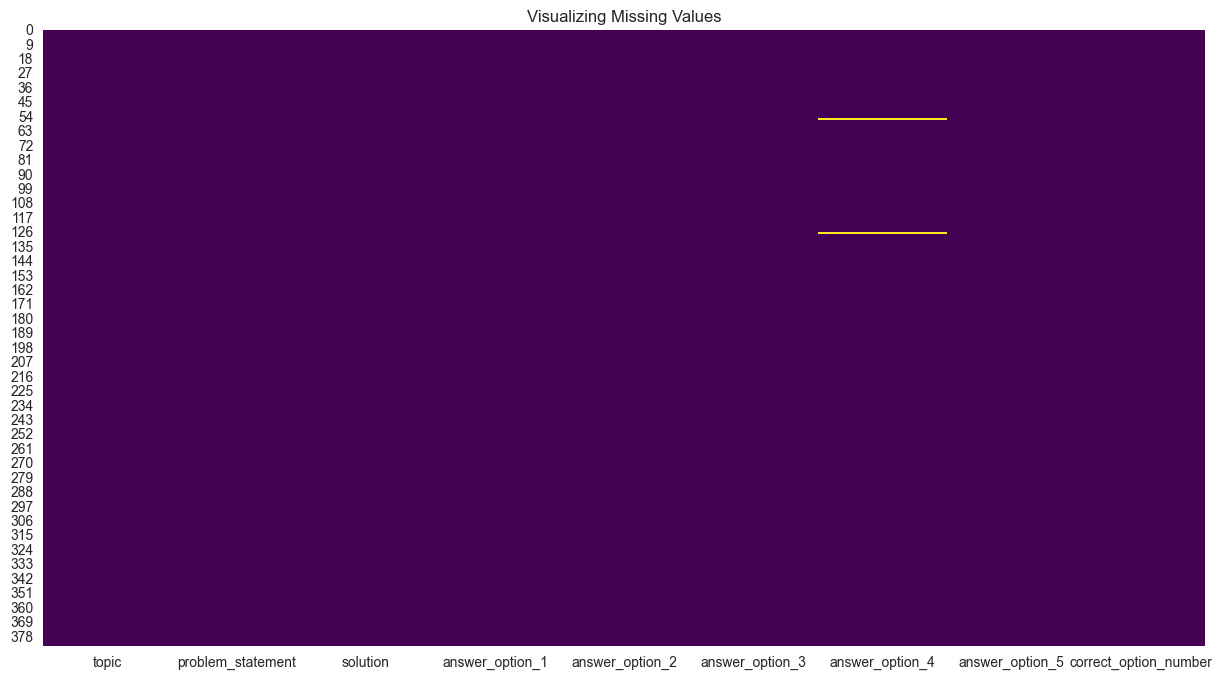

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualizing Missing Values')
plt.show()

Numerical columns: ['correct_option_number']
Categorical columns: ['topic', 'problem_statement', 'solution', 'answer_option_1', 'answer_option_2', 'answer_option_3', 'answer_option_4', 'answer_option_5']


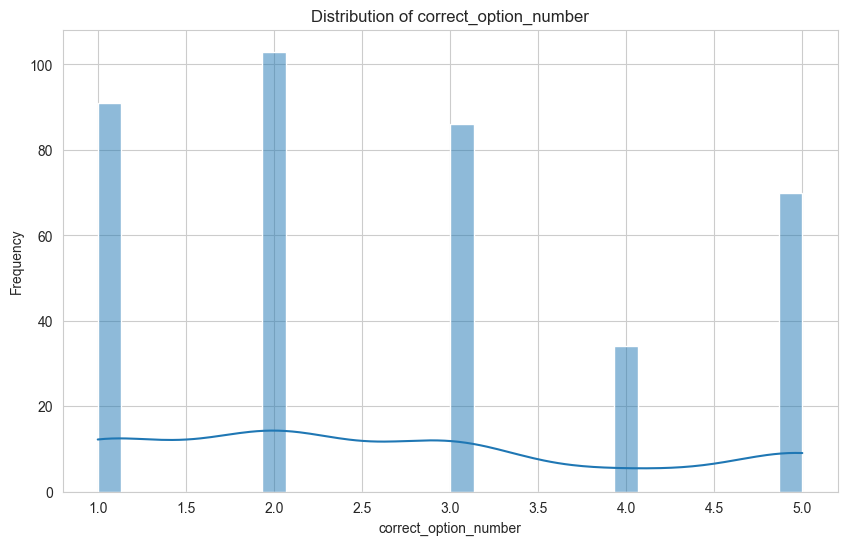

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Plotting distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


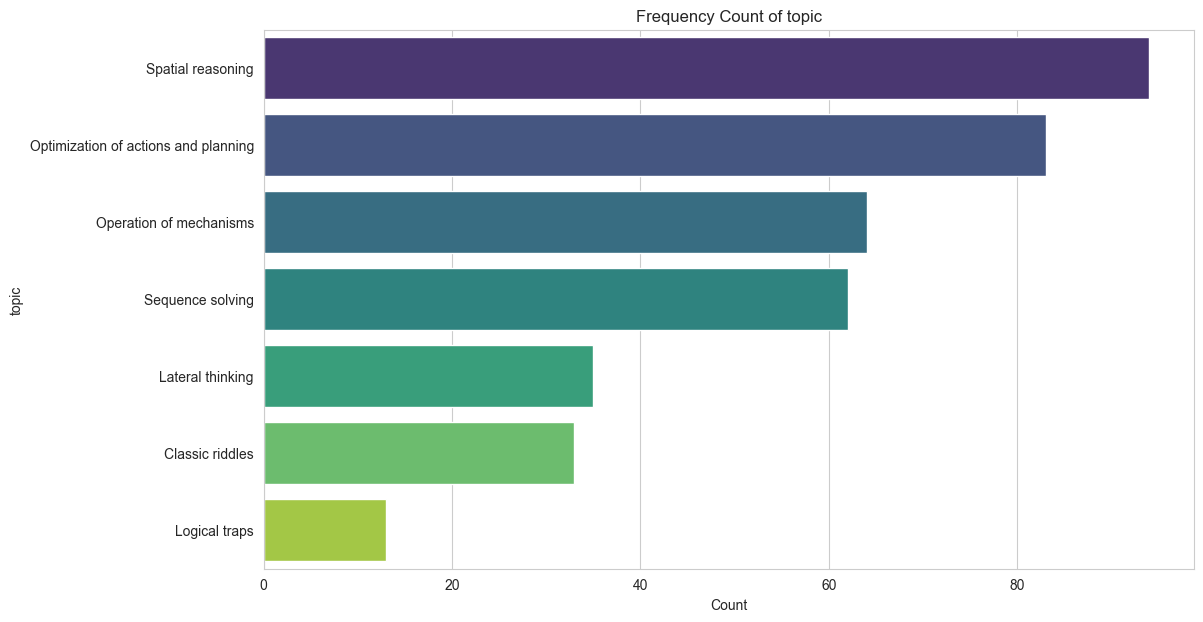

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


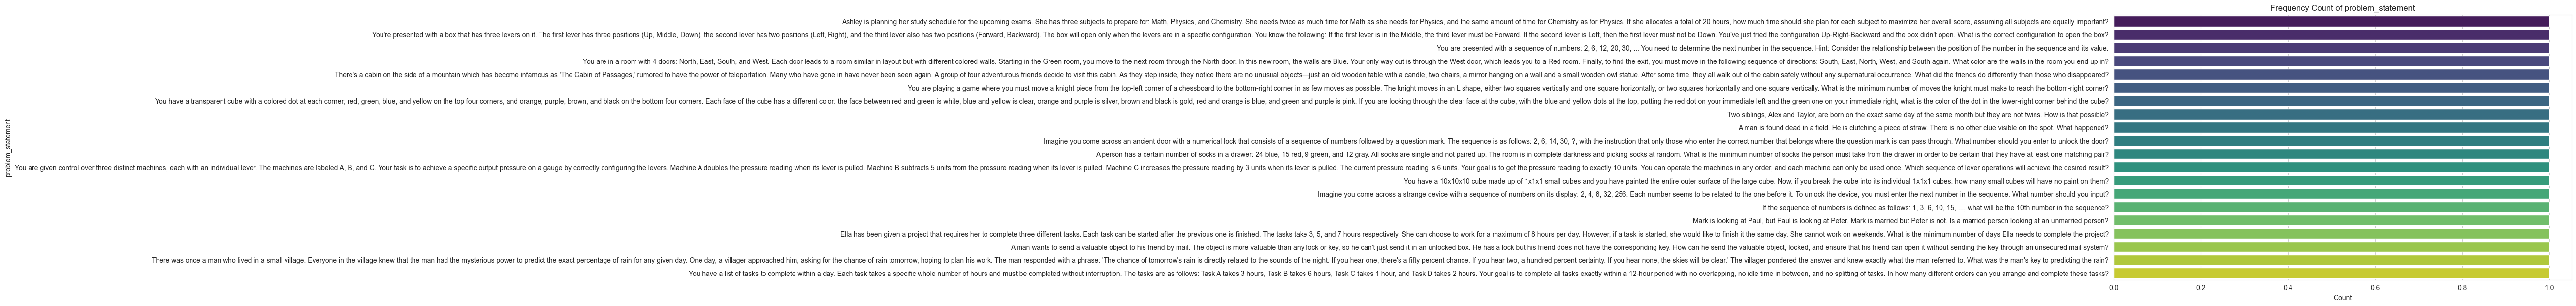

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


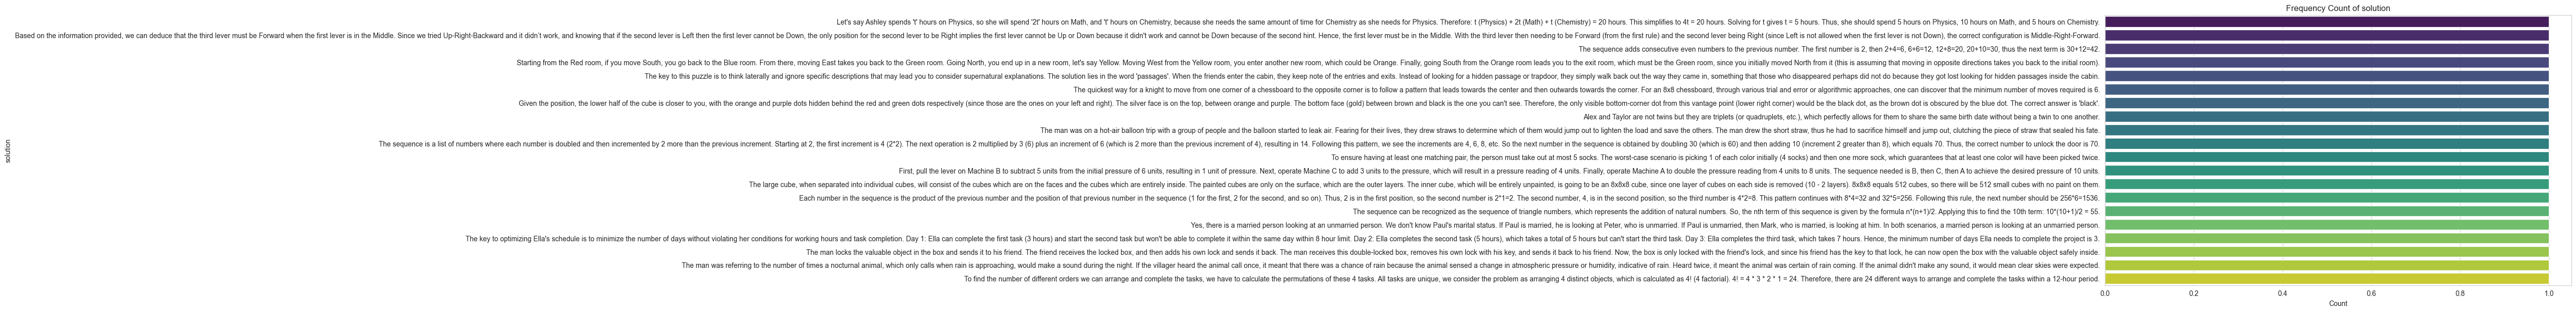

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


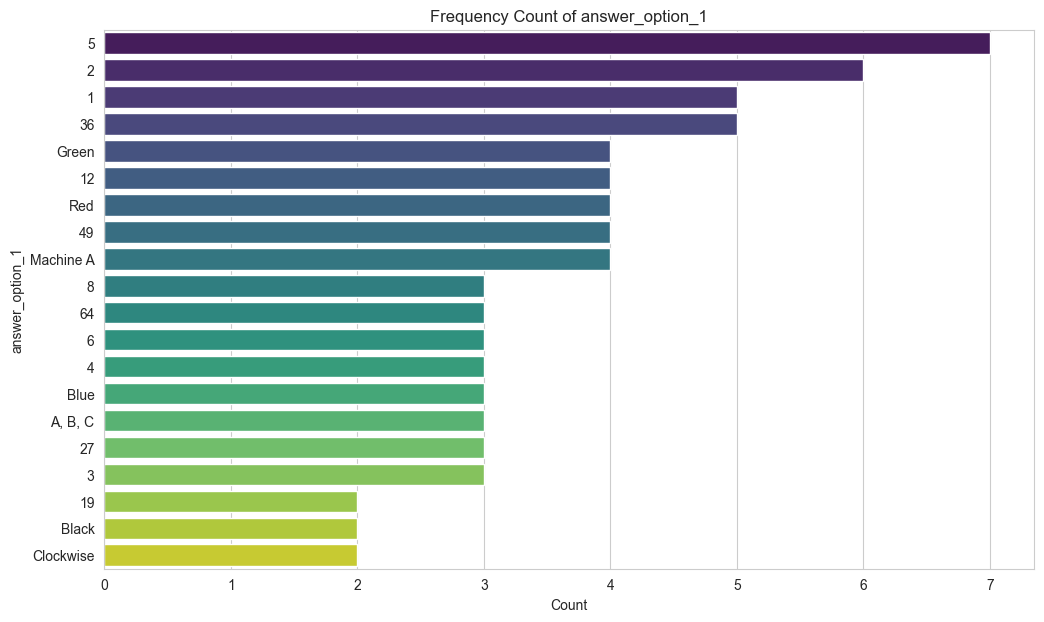

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


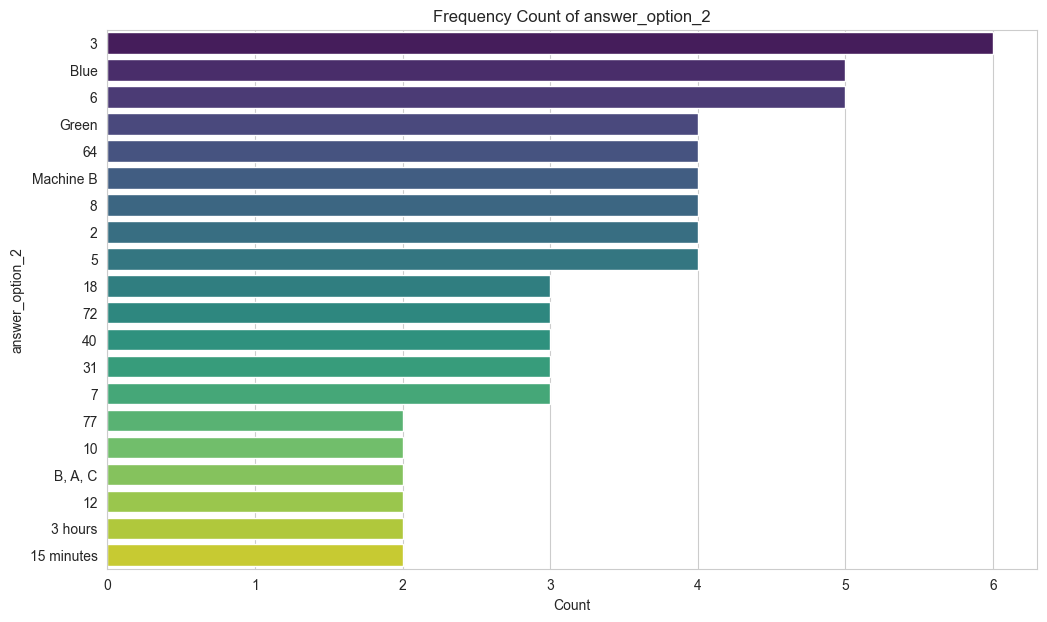

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


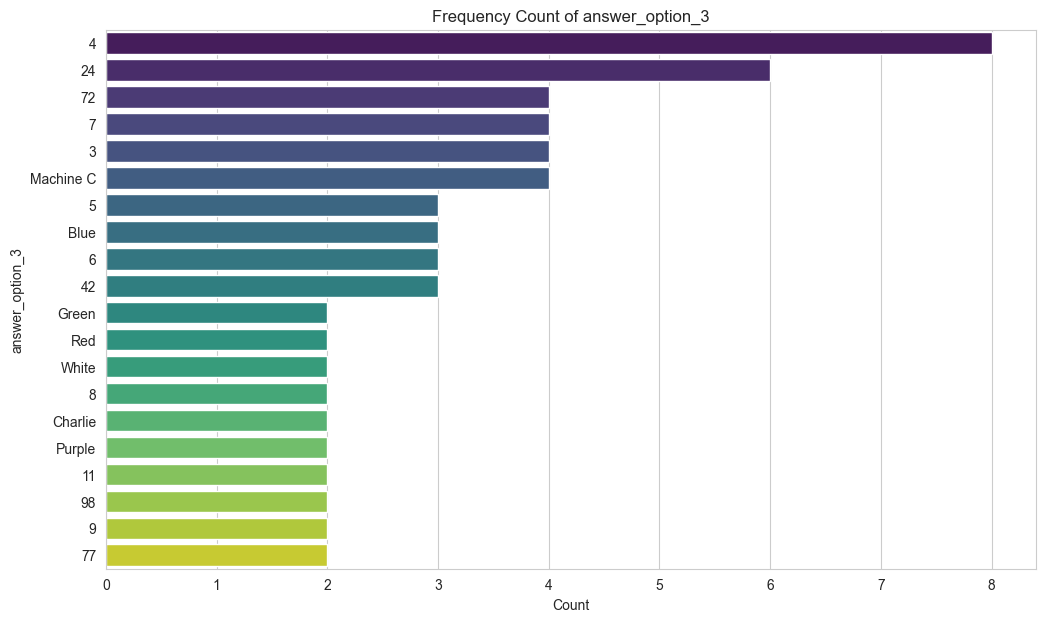

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


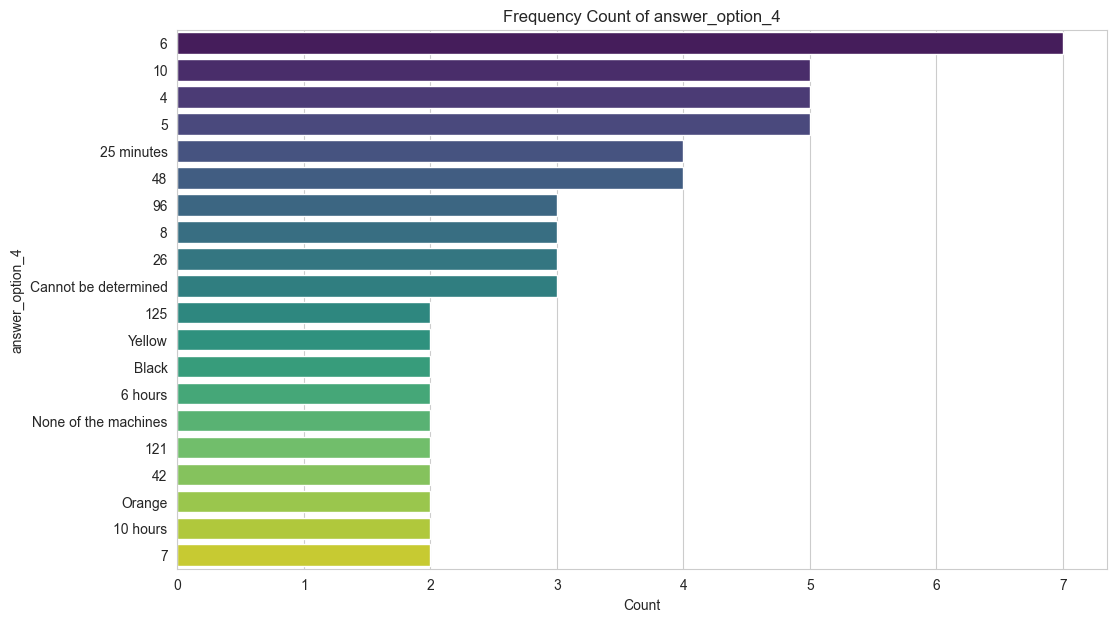

C:\Users\Ramana\AppData\Local\Temp\ipykernel_3748\2342272953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=top_categories, palette='viridis')


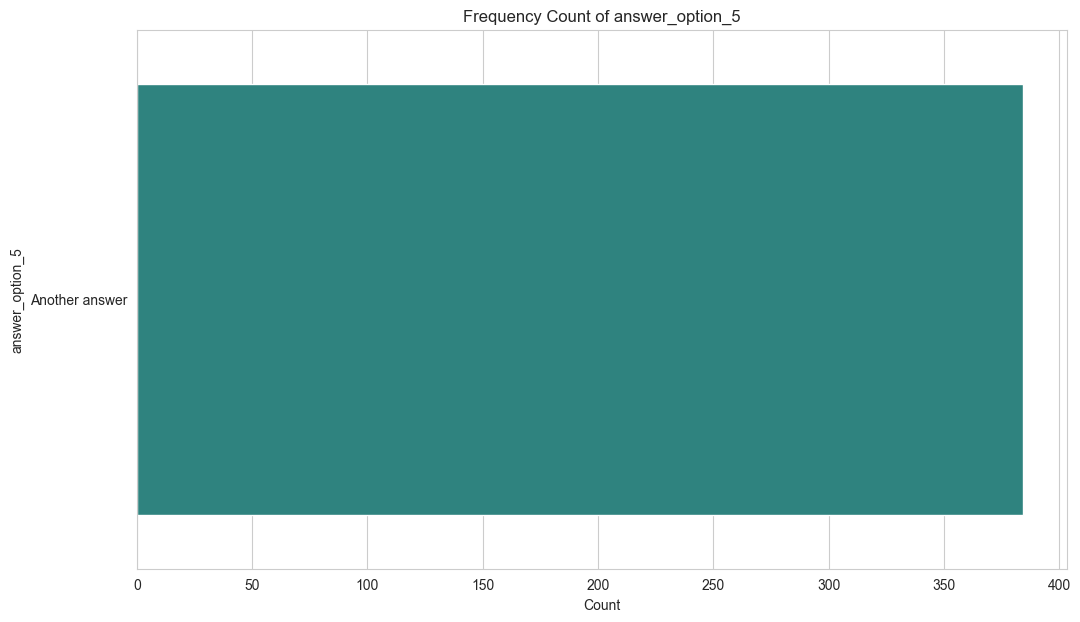

In [11]:
# Plotting counts of categorical features
for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    # Taking top 20 categories for high-cardinality features
    top_categories = df[col].value_counts().nlargest(20).index
    sns.countplot(y=col, data=df, order=top_categories, palette='viridis')
    plt.title(f'Frequency Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [13]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    plt.figure(figsize=(14, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()